**Import**

In [80]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import plotly.express as px

**Load the data using pandas**

In [81]:
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

In [82]:
#View the top 10 rows
data.head(10)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
5,6/30/1980,1980,Jun,1,105.55,0.75,23829.315,2573,5,20.298,-1.610947,2.9,754.5,Mediumfamilycar,Illinois
6,7/31/1980,1980,Jul,1,82.45,0.50,32896.064,2828,3,34.585,0.413098,2.9,729.6,Supperminicar,Illinois
7,8/31/1980,1980,Aug,1,98.76,0.25,28837.174,2917,3,55.650,0.378527,3.0,734.9,Supperminicar,New York
8,9/30/1980,1980,Sep,1,87.68,0.07,22652.628,1138,3,33.308,-0.670770,5.2,705.6,Smallfamiliycar,California
9,10/31/1980,1980,Oct,1,101.45,0.00,27712.800,4582,5,42.522,0.216688,4.4,609.7,Smallfamiliycar,New York


**Find the average automobile sales of each vehicle type**

In [83]:
df = data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()

df

,Vehicle_Type,Automobile_Sales
0,Executivecar,2656.115714
1,Mediumfamilycar,2397.890602
2,Smallfamiliycar,2132.418033
3,Sports,2823.179787
4,Supperminicar,1746.359211


**Plot bar chart using data above**

<BarContainer object of 5 artists>

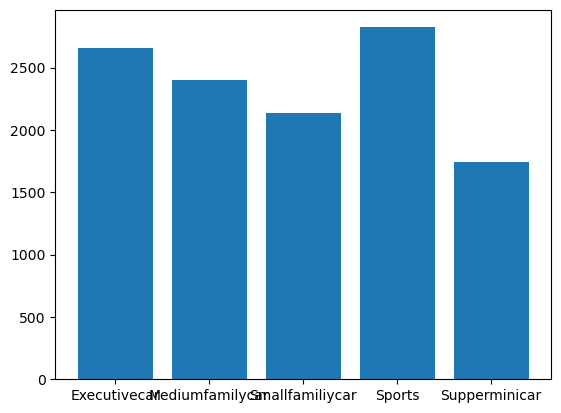

In [84]:
plt.bar(df['Vehicle_Type'], df['Automobile_Sales'])

**Extract data during recession**

In [7]:
recession_data = data[data['Recession'] == 1]

In [86]:
#View recession data
recession_data.head(5)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


**Plot the group bar chart demonstrating the effect of unemployment rate on the automobile sales of each vehicle types**

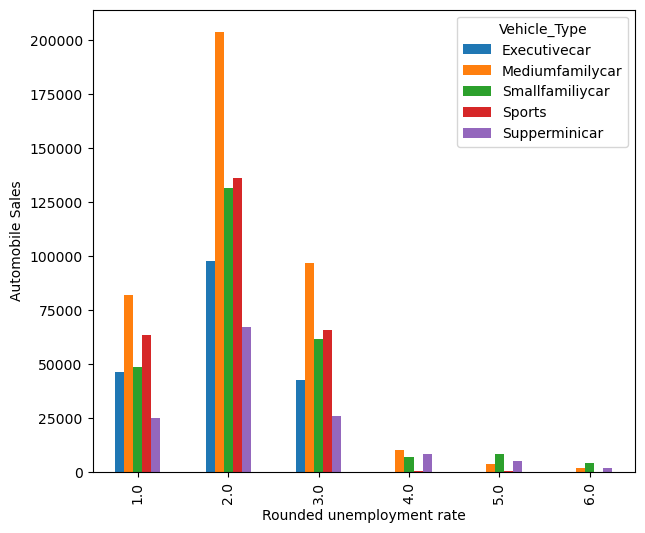

In [88]:
data_chart4 = data.loc[:, ['unemployment_rate', 'Automobile_Sales', 'Vehicle_Type']]

data_chart4['unemployment_rate'] = data_chart4['unemployment_rate'].round(0)

df_grouped = data_chart4.groupby(['unemployment_rate', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()

# Replace all NaN values with 0
df_grouped.fillna(0, inplace=True)

# Plot a bar chart using the DF
ax = df_grouped.plot(kind = 'bar')
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(7, 6)
# Change the axes labels
ax.set_xlabel("Rounded unemployment rate")
ax.set_ylabel("Automobile Sales")

# Use this to show the plot in a new window
plt.show()


**Plot Total Monthly Automobile sales using line chart.**

In [95]:
#create a new dataframe containing data of total automobile sales in each month
df_totalMonthlySales = data.groupby('Month')['Automobile_Sales'].sum().reset_index()

# Create a month order dictionary (adjust month names if needed)
month_order = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
               'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# Add a new column 'Month_Order' based on the dictionary
df_totalMonthlySales['Month_Order'] = df_totalMonthlySales['Month'].map(month_order)

# Sort by 'Month_Order'
df_totalMonthlySales = df_totalMonthlySales.sort_values(by='Month_Order')

# Drop the temporary 'Month_Order' column (optional)
df_totalMonthlySales = df_totalMonthlySales.drop('Month_Order', axis=1)

# View the dataframe
df_totalMonthlySales

,Month,Automobile_Sales
4,Jan,100256.60
3,Feb,102288.70
7,Mar,106686.84
0,Apr,108967.20
8,May,101611.70
6,Jun,102850.40
5,Jul,101211.60
1,Aug,97429.00
11,Sep,104372.80
10,Oct,105299.50


**Plot bar chart for average number of vehicles sold during the given year**

In [75]:
# test extracting data in the year 2011
yearly_data = data[data['Year'] == 2011]

# extract average automobile sales of each vehicle types
yearly_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()

,Vehicle_Type,Automobile_Sales
0,Executivecar,2225.200000
1,Mediumfamilycar,2839.666667
2,Smallfamiliycar,4968.000000
3,Sports,4410.366667
4,Supperminicar,4296.700000


**Plot Total Advertisement Expenditure for each vehicle using pie chart**

In [96]:
# Extract total advertising expenditure of each vehicle types
yearly_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()

,Vehicle_Type,Advertising_Expenditure
0,Executivecar,15982
1,Mediumfamilycar,12795
2,Smallfamiliycar,3143
3,Sports,8452
4,Supperminicar,4149
